In [1303]:
from dataclasses import dataclass
from icecream import ic
import matplotlib.pyplot as plt
import copy
import numpy as np
import pandas as pd

In [1304]:
@dataclass
class Request:
  id: int
  receipt_time: int
  process_time: int
  waiting_time: int = 0
  ticks_in_pocessor: int = 0

In [1305]:
# Входные данные

requests = [
    Request(1, 0, 4),
    Request(2, 2, 4),
    Request(3, 6, 2),
    Request(4, 10, 4),
    Request(5, 18, 8),
    Request(6, 22, 2),
    Request(7, 32, 8),
    Request(8, 34, 2),
    Request(9, 44, 4),
    Request(10, 48, 0),
]                               # заявки
life_time = 60                  # общее время рассматриваемого интервала
requests_count = len(requests)  # общее количество заявок

In [1306]:
input_time = life_time / requests_count                     # среднее время между заявками
λ = 1 / input_time                                          # интенсивность входного потока
all_process_time = sum(r.process_time for r in requests)    # общее время обработки заявок
avg_process_time = all_process_time / requests_count            # среднее время обработки одной заявки
μ = 1 / avg_process_time                                    # интенсивность обслуживания

FORMAT_NUM = '{:.2f}'
print('Среднее время между заявками', FORMAT_NUM.format(input_time), sep=' = ')
print('Интенсивность входного потока', FORMAT_NUM.format(λ), sep=' = ')
print('Общее время обработки заявок', FORMAT_NUM.format(all_process_time), sep=' = ')
print('Среднее время обработки одной заявки', FORMAT_NUM.format(avg_process_time), sep=' = ')
print('Интенсивность обслуживания', FORMAT_NUM.format(μ), sep=' = ')

Среднее время между заявками = 6.00
Интенсивность входного потока = 0.17
Общее время обработки заявок = 38.00
Среднее время обработки одной заявки = 3.80
Интенсивность обслуживания = 0.26


In [1307]:
# Симуляция процесса

def run(requests):
  queue_snapshots = []
  queue = []
  working_time = 0

  for t in range (0, life_time * 10 + 1):
    if (len(queue) != 0):
      queue[0].ticks_in_pocessor += 1
      if queue[0].process_time * 10 <= queue[0].ticks_in_pocessor:
        queue.remove(queue[0])
    request = next((x for x in requests if x.receipt_time * 10 == t), None)
    if not (request is None or request.process_time == 0 and len(queue) == 0):
      queue.append(request)
    for i in range (1, len(queue)):
      queue[i].waiting_time += 1
    if (len(queue) != 0):
      working_time += 1
    queue_snapshots.append(copy.deepcopy(queue))
  
  working_time /= 10
  for snapshot in queue_snapshots:
    for request in snapshot:
      request.process_time /= 10
      request.waiting_time /= 10
      request.ticks_in_pocessor /= 10
  for request in requests:
    request.process_time /= 10
    request.waiting_time /= 10
    request.ticks_in_pocessor /= 10

  free_time = life_time - working_time
  ρ = working_time / life_time

  return free_time, ρ, queue_snapshots, working_time

In [1308]:
# Диаграммап симуляции и результат симуляции

def show_diagram(queue_snapshots):
  plt.title('Диаграмма нахождения заявок в системе (работы системы)')
  plt.xlabel('Время нахождения заявки в системе')
  plt.ylabel('Номер заявки, находящейся в системе')
  plt.grid()
  plt.xticks(np.arange(0, life_time+1, 5))
  plt.gca().set_xlim([0, life_time+1])
  plt.gca().set_ylim([0, 10+1])
  x_vals = []
  y_vals = []
  for i in range (len(queue_snapshots)):
    for j in range (len(queue_snapshots[i])):
      x_vals.append(queue_snapshots[i][j].receipt_time + queue_snapshots[i][j].ticks_in_pocessor + queue_snapshots[i][j].waiting_time)
      y_vals.append(queue_snapshots[i][j].id)
  plt.plot(x_vals, y_vals,'ro', markersize=2)
  plt.show()


def diagram_results(working_time, free_time, ρ):
  FORMAT_NUM = '{:.2f}'
  print('Суммарное время занятости системы', FORMAT_NUM.format(working_time), sep=' = ')
  print('Суммарное время простоя системы', FORMAT_NUM.format(free_time), sep=' = ')
  print('Загрузка системы', FORMAT_NUM.format(ρ), sep=' = ')

In [1309]:
# Диаграмма очереди системы, характеристики очереди

def show_queue_diagram(queue_snapshots):
  plt.title('Диаграмма заявок, стоящих в очереди')
  plt.xlabel('Время нахождения заявки в очереди')
  plt.ylabel('Номер заявки, находящейся в очереди')
  plt.grid()
  plt.xticks(np.arange(0, life_time+1, 5))
  plt.gca().set_xlim([0, life_time+1])
  plt.gca().set_ylim([0, 10+1])
  x_vals = []
  y_vals = []
  for i in range (len(queue_snapshots)):
    for j in range (1, len(queue_snapshots[i])):
      x_vals.append(queue_snapshots[i][j].receipt_time + queue_snapshots[i][j].ticks_in_pocessor + queue_snapshots[i][j].waiting_time)
      y_vals.append(queue_snapshots[i][j].id)
  plt.plot(x_vals, y_vals,'ro', markersize=2)
  plt.show()


def queue_diagram_results():
  FORMAT_NUM = '{:.2f}'
  waiting_time = sum(r.waiting_time for r in requests)
  avg_waiting_time = waiting_time / requests_count
  print('Суммарное время ожидания', FORMAT_NUM.format(waiting_time), sep=' = ')
  print('Среднее время ожидания', FORMAT_NUM.format(avg_waiting_time), sep=' = ')
  return avg_waiting_time


def being_results(queue_snapshots):
  FORMAT_NUM = '{:.2f}'
  being_time = sum(len(y)/10 for y in queue_snapshots) / requests_count
  being_count = sum(len(y)/10 for y in queue_snapshots) / life_time
  print('Время пребывания заявок в системе', FORMAT_NUM.format(being_time), sep=' = ')
  print('Среднее количество заявок в системе', FORMAT_NUM.format(being_count), sep=' = ')
  return being_count, being_time


def waiting_results(queue_snapshots):
  FORMAT_NUM = '{:.2f}'
  waiting_count = 0
  for i in range (len(queue_snapshots)):
    for j in range (1, len(queue_snapshots[i])):
      waiting_count += 1
  waiting_count /= 10
  waiting_count /= life_time
  print('Среднее число заявок в очереди за единицу времени', FORMAT_NUM.format(waiting_count), sep=' = ')
  return waiting_count

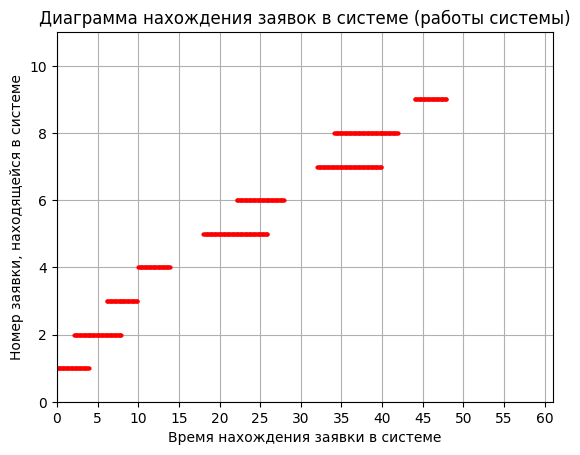

Суммарное время занятости системы = 38.00
Суммарное время простоя системы = 22.00
Загрузка системы = 0.63


In [1310]:
# Интуитивный подход
free_time, ρ, queue_snapshots, working_time = run(requests)
show_diagram(queue_snapshots)
diagram_results(working_time, free_time, ρ)

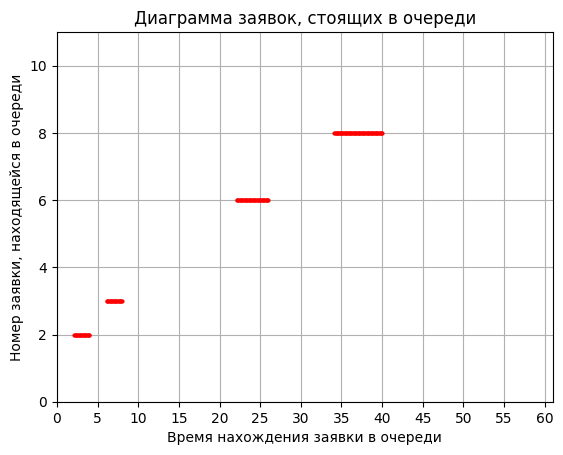

Суммарное время ожидания = 14.00
Среднее время ожидания = 1.40
Время пребывания заявок в системе = 5.20
Среднее количество заявок в системе = 0.87
Среднее число заявок в очереди за единицу времени = 0.23


In [1311]:
show_queue_diagram(queue_snapshots)
avg_waiting_time = queue_diagram_results()
being_count, being_time = being_results(queue_snapshots)
waiting_count = waiting_results(queue_snapshots)

In [1312]:
intuitive = [input_time, avg_process_time, ρ, waiting_count, avg_waiting_time, being_count, being_time]

In [1313]:
# Теоретический подсчет

ρ = intuitive[2]
avg_waiting_time = avg_process_time * ρ / (1 - ρ)
being_time = avg_process_time / (1 - ρ)
waiting_count = ρ ** 2 / (1 - ρ)
being_count = ρ / (1 - ρ)

FORMAT_NUM = '{:.2f}'
print('Загрузка системы', FORMAT_NUM.format(ρ), sep=' = ')
print('Среднее время ожидания', FORMAT_NUM.format(avg_waiting_time), sep=' = ')
print('Время пребывания заявок в системе', FORMAT_NUM.format(being_time), sep=' = ')
print('Среднее число заявок в очереди за единицу времени', FORMAT_NUM.format(waiting_count), sep=' = ')
print('Среднее количество заявок в системе', FORMAT_NUM.format(being_count), sep=' = ')

theoretical = [input_time, avg_process_time, ρ, waiting_count, avg_waiting_time, being_count, being_time]

Загрузка системы = 0.63
Среднее время ожидания = 6.56
Время пребывания заявок в системе = 10.36
Среднее число заявок в очереди за единицу времени = 1.09
Среднее количество заявок в системе = 1.73


In [1314]:
# Детерминированный случай

requests = []
for i in range(10):
  requests.append(Request(i + 1, input_time * i, 3.8))

life_time = 60
requests_count = len(requests)

input_time = life_time / requests_count
λ = 1 / input_time
all_process_time = sum(r.process_time for r in requests)
avg_process_time = all_process_time / input_time
μ = 1 / avg_process_time

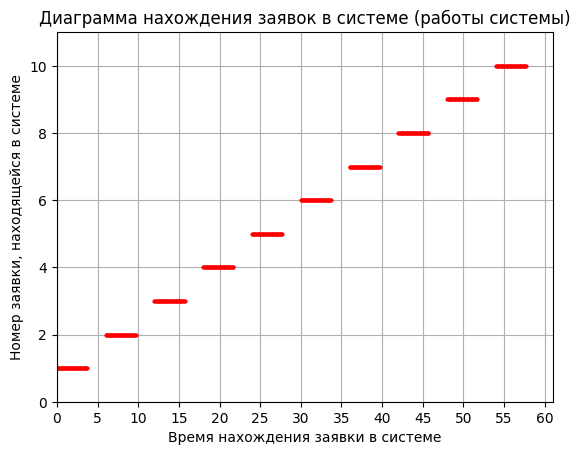

Суммарное время занятости системы = 38.00
Суммарное время простоя системы = 22.00
Загрузка системы = 0.63


In [1315]:
free_time, ρ, queue_snapshots, working_time = run(requests)
show_diagram(queue_snapshots)
diagram_results(working_time, free_time, ρ)

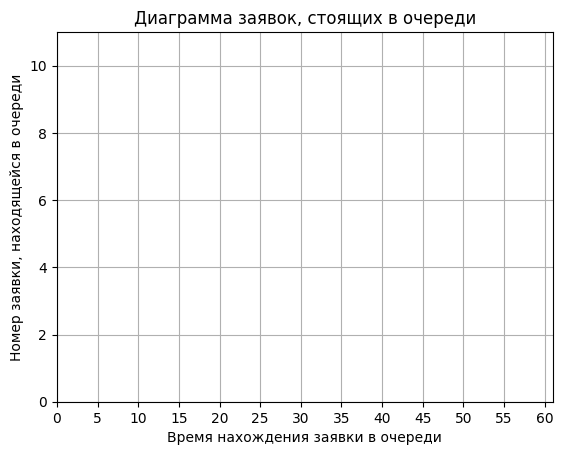

Суммарное время ожидания = 0.00
Среднее время ожидания = 0.00
Время пребывания заявок в системе = 3.80
Среднее количество заявок в системе = 0.63
Среднее число заявок в очереди за единицу времени = 0.00


In [1316]:
show_queue_diagram(queue_snapshots)
avg_waiting_time = queue_diagram_results()
being_count, being_time = being_results(queue_snapshots)
waiting_count = waiting_results(queue_snapshots)

In [1317]:
determine = [input_time, avg_process_time, ρ, waiting_count, avg_waiting_time, being_count, being_time]

In [1318]:
# сравнительная таблитца

FORMAT_NUM = '{:.2f}'
data = {
    'Характеристики системы': ['Т_вх (мин)', 'Т_0 (мин)', 'ρ', 'N_w (заяв)', 'Т_w (мин)', 'N_s (заявки)', 'T_n (мин)'],
    'Интуитивный подход': [FORMAT_NUM.format(item) for item in intuitive],
    'Теор. подсчет.': [FORMAT_NUM.format(item) for item in theoretical],
    'Детермин. поток': [FORMAT_NUM.format(item) for item in determine]
}

df = pd.DataFrame(data)
print(df)

  Характеристики системы Интуитивный подход Теор. подсчет. Детермин. поток
0             Т_вх (мин)               6.00           6.00            6.00
1              Т_0 (мин)               3.80           3.80            6.33
2                      ρ               0.63           0.63            0.63
3             N_w (заяв)               0.23           1.09            0.00
4              Т_w (мин)               1.40           6.56            0.00
5           N_s (заявки)               0.87           1.73            0.63
6              T_n (мин)               5.20          10.36            3.80
